# Convolution

Animated visualizer for convolution.

In [1]:
%matplotlib inline

import time

import numpy as np
from scipy.signal import gaussian

from neurodsp.sim import sim_powerlaw
from neurodsp.plts import plot_time_series
from neurodsp.utils import set_random_seed

In [2]:
# Import local code
from vcode.build.convolution import *
from vcode.measures.convolution import compute_convolution

from vcode.plts.base import plot_data
from vcode.plts.utils import clear_output, animate_plot

## Setup

Setup for creating the convolution visualizer.

### Settings

In [3]:
import seaborn as sns
sns.set_context('talk')

In [4]:
# Signal settings
n_seconds = 1.
fs = 250

In [5]:
# Kernel settings
kernel_length = 26        # Length of the gaussian kernel, in samples
kernel_std = 5            # Standard deviation of the gaussian kernel

In [6]:
# Gifmaking settings
SAVE = False

In [7]:
# Set random seed
set_random_seed(505)

## Animation

Wrods, words, words,

### Create Signal

In [8]:
sig = sim_powerlaw(n_seconds, fs, f_range=(2, None))

### Create Kernel

In [9]:
# Create the kernel, and an associated samples definiton
kernel = gaussian(kernel_length, kernel_std, sym=True) * 0.1

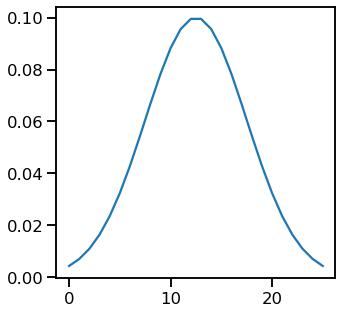

In [10]:
plot_data(kernel)

### Plot signal & kernel

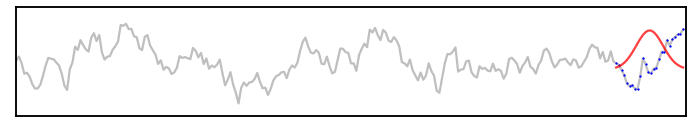

In [11]:
build_kernel_slide(sig, kernel)

### Plot convolution output

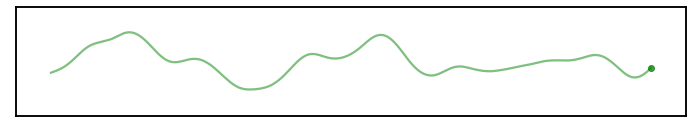

In [12]:
build_convolution_output(sig, kernel)

## Make Combined Animation

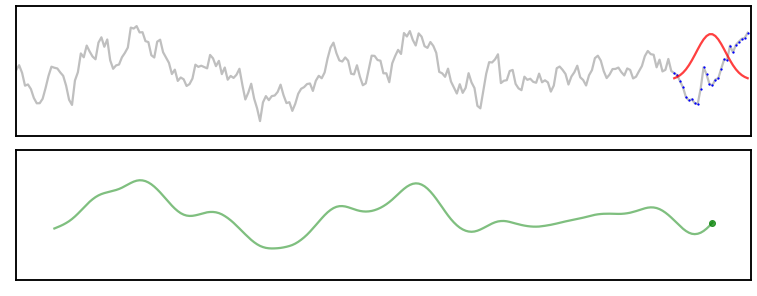

In [13]:
build_all(sig, kernel, label='conv_short', save=SAVE)

## Check convolution

Since we are computing the convolution manually, double check we get the expected results.

In [14]:
# Compute the expected output of the convolution, from numpy
expected = np.convolve(kernel, sig, 'valid')

In [15]:
# Recompute the custom convolution, as we do for the plots
convolved = compute_convolution(sig, kernel)

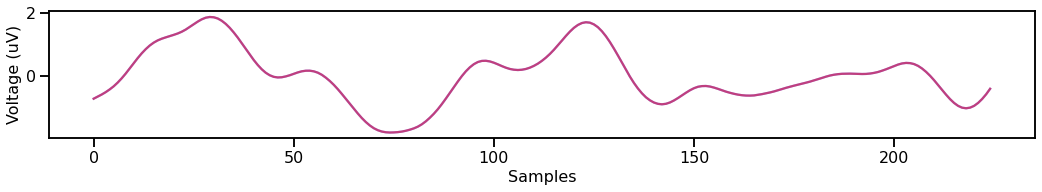

In [16]:
# Plot the expected and computed convolution
plot_time_series(None, [expected, convolved[~np.isnan(convolved)]],
                 alpha=0.5, colors=['b', 'r'])